**Introduction:**
The CIFAR-10 dataset contains 60,000 color images of 32 x 32 pixels in 3 channels divided into 10 classes. Each class contains 6,000 images. The training set contains 50,000 images, while the test sets provides 10,000 images.This is a classification problem with 10 classes(muti-label classification). We can take a view on this image for more comprehension of the dataset.

This image taken from the CIFAR repository. (https://www.cs.toronto.edu/~kriz/cifar.html). I have loaded this dataset from keras datasets for this classification problem.

In [1]:
"""

Daniel Dang                       DAN21493659

"""
# importing of modules for CIFAR-10 CNN
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#training constants
BATCH_SIZE = 128
N_EPOCH = 10 #number of times it runs the test
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

print('Main variables initialised.')

# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
CHANNELS = 3
ROWS = 32
COL = 32

print('Image variables initialisation')

#load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')

# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES)

# changes it to float
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255

Main variables initialised.
Image variables initialisation
170498071/170498071 [==============================] - 3s 0us/step
input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
Selected_Image = 3
image = input_X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show()

Selected_Image = 4
image = input_X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show()

In [ ]:
# Layer defiintion

cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), padding='same', input_shape=(ROWS, COL, CHANNELS)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(512))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(N_CLASSES))
cnn.add(Activation('softmax'))

print('CNN network definition.')

In [ ]:
# compiling the model
cnn.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

cnn.summary()


In [6]:
# training/fitting of the CNN model

history = cnn.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

Epoch 1/10
313/313 [==============================] - 78s 245ms/step - loss: 1.7166 - accuracy: 0.3924 - val_loss: 1.5729 - val_accuracy: 0.4308
Epoch 2/10
313/313 [==============================] - 73s 235ms/step - loss: 1.3619 - accuracy: 0.5174 - val_loss: 1.3243 - val_accuracy: 0.5502
Epoch 3/10
313/313 [==============================] - 84s 267ms/step - loss: 1.2325 - accuracy: 0.5634 - val_loss: 1.3272 - val_accuracy: 0.5446
Epoch 4/10
313/313 [==============================] - 75s 241ms/step - loss: 1.1442 - accuracy: 0.5963 - val_loss: 1.1317 - val_accuracy: 0.6083
Epoch 5/10
313/313 [==============================] - 77s 247ms/step - loss: 1.0679 - accuracy: 0.6241 - val_loss: 1.1379 - val_accuracy: 0.6086
Epoch 6/10
313/313 [==============================] - 77s 245ms/step - loss: 1.0089 - accuracy: 0.6479 - val_loss: 1.1358 - val_accuracy: 0.6152
Epoch 7/10
313/313 [==============================] - 74s 238ms/step - loss: 0.9498 - accuracy: 0.6677 - val_loss: 1.1816 - val_ac

79/79 [==============================] - 4s 48ms/step - loss: 1.0730 - accuracy: 0.6190

Test score/loss: 1.0730220079421997
Test accuracy: 0.6190000176429749
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


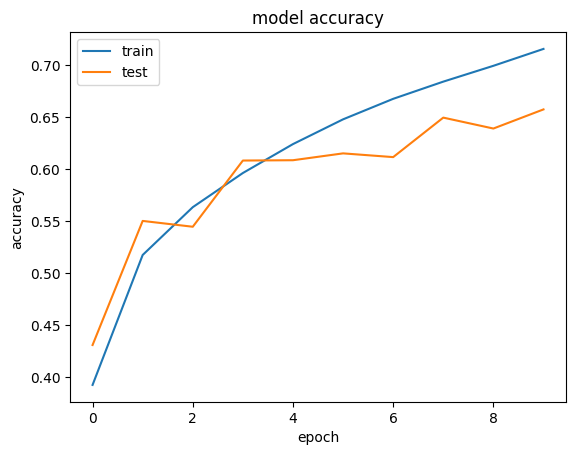

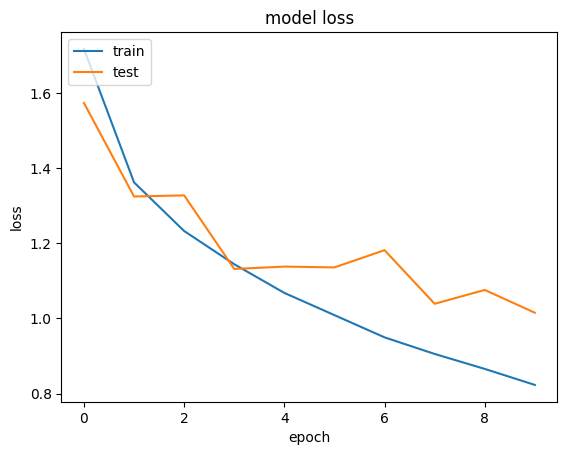

In [10]:
#Testing
score = cnn.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [14]:
# Reshape input data for CNN
input_X_train = input_X_train.reshape(-1, 32, 32, 3)
input_X_test = input_X_test.reshape(-1, 32, 32, 3)

# Define hyperparameters
batch_size = 32
learning_rate = 0.001  # Adjust this according to your needs
N_EPOCH = 200
VALIDATION_SPLIT = 0.2

# CNN Model
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(N_CLASSES, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=learning_rate)
cnn.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training with early stopping
history = cnn.fit(input_X_train, output_Y_train, batch_size=batch_size, epochs=N_EPOCH, verbose=1,
                    validation_split=VALIDATION_SPLIT, callbacks=[early_stopping])

# Evaluate the model on the test set
score = cnn.evaluate(input_X_test, output_Y_test, verbose=0)
print("Test accuracy:", score[1])
print("Val accuracy:", history.history['val_accuracy'][-1])
print("Loss:", history.history['val_loss'][-1])



Epoch 1/200
1250/1250 [==============================] - 76s 61ms/step - loss: 1.5435 - accuracy: 0.4435 - val_loss: 1.3149 - val_accuracy: 0.5411
Epoch 2/200
1250/1250 [==============================] - 76s 61ms/step - loss: 1.2732 - accuracy: 0.5478 - val_loss: 1.1776 - val_accuracy: 0.5808
Epoch 3/200
1250/1250 [==============================] - 77s 62ms/step - loss: 1.1609 - accuracy: 0.5865 - val_loss: 1.1073 - val_accuracy: 0.6106
Epoch 4/200
1250/1250 [==============================] - 76s 61ms/step - loss: 1.0770 - accuracy: 0.6192 - val_loss: 1.0541 - val_accuracy: 0.6332
Epoch 5/200
1250/1250 [==============================] - 77s 61ms/step - loss: 1.0119 - accuracy: 0.6417 - val_loss: 1.0510 - val_accuracy: 0.6325
Epoch 6/200
1250/1250 [==============================] - 77s 61ms/step - loss: 0.9612 - accuracy: 0.6610 - val_loss: 1.0627 - val_accuracy: 0.6383
Epoch 7/200
1250/1250 [==============================] - 77s 62ms/step - loss: 0.9084 - accuracy: 0.6787 - val_loss: 0

79/79 [==============================] - 3s 35ms/step - loss: 0.9686 - accuracy: 0.6638

Test score/loss: 0.9686325192451477
Test accuracy: 0.6638000011444092
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


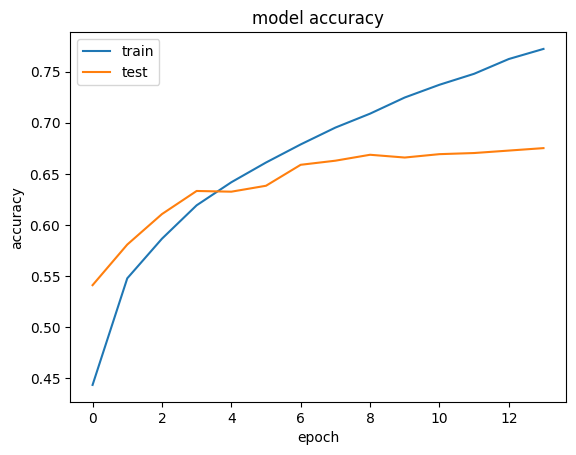

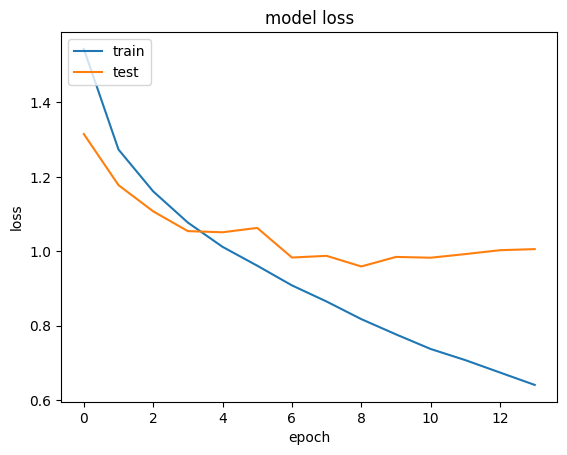

In [15]:
#Testing
score = cnn.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in stats
print(history.history.keys())

# summarize history data for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history data for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()